<p style="text-align: center;"><h1> Exploring Suicide Causes in groups of people </h1> </p>
<h3> By Jainy Patel and Rohan Mishra </h3>

# Introduction
## Why is suicide important??
Suicide is the 10th leading cause of death and while it may seem like a small number, the suicide rate has increased by about 33%, from 1999 to 2017, according to [CBS Baltimore](https://baltimore.cbslocal.com/2019/06/21/us-suicide-rate-up-33-percent-since-1999/).<br>
These tragedies don't only affect the victim's families negatively but it also affects others around them. As being part of a pressing issue, we should be trying to understand where the problem comes from or if there is anything in the data that can help us understand this issue more.<br>
There are lives being lost right now and any possible insight that can be gained could be potentially helpful. 
## What are we trying to do?
We're essentially trying to find what factors can affect the number of suicides that happen within the framework of a community of people. Rather than looking at individual reasons for this phenomenon, we're trying to look at factors that are less individual and more plural and see if there's any particular way that society as a whole is contributing to this phenomenon. In essence, we're trying to answer the question that if we're given a sample of people to observe, what factors would contribute to the phenomenon of suicide? Notice that we say people, not person. Unlike a lot of other studies, we're not looking at factors that could contribute to an individual suicide.  
## Where we're getting our data from 
We found our dataset online, on [Kaggle.com](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) <br> 
This is a dataset that shows data on countries, years, gender, age, suicide number, GDP per year and capita, population, and generation. What's impressive about this dataset that it groups all of these people by their gender, country, age etc and gives us separate statistics for each group of people

# 1. Getting started
# 1.1 Imports
The main imports we're using are: 

Pandas - used to manipulate data and analyze<br>
Numpy - used for multiple numbers of mathematical operations<br>
Folium - used for data visuals such as a map<br>
MatPlotLib - used for data visuals on graphs<br>
HeatMap - used to show a gradually changing effect over data via coloring shade
SeaBorn - used to plot data on a heatmap<br>
sklearn - used for machine learning and making predictions

In [1]:
!pip install folium
import pandas as pd
import numpy as np
import folium
import matplotlib.pylab as plt
from folium.plugins import HeatMap, HeatMapWithTime
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# 1. Acquiring the data
The data is loaded from the csv file and fit to a pandas dataframe. 

In [2]:
# Importing the data and looking at it.
df = pd.read_csv("master.csv", sep=',')
display(df.head(10))

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


 # 1.2 Cleaning the data
 The dataset is relatively clean, however there are a few minor cases where some data has been transcribed in the form of '-' or '--'. We will replace them with NaN, to ensure they don't corrupt any calculations that take place later.

In [3]:
df=df.replace('-',np.NaN)
df=df.replace('--',np.NaN)

# 2. Exploring the given dataset
Now that we have the dataset on suicide rates, we can try and explore some of the possible factors that help contribute to suicide rate. We run the pandas describe function just to get a general sense of what numerical data is contained in the dataframe and what ranges of values are in them. 

In [4]:
display(df.describe())

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


The description gives us some preliminary insight into the suicide rate data. It helps us get an idea of the range of years that this data covers, which is 1985-2016. It also gives us the population numbers for each of the countries involved, the suicides per 100 thousand of the population, and the <b>gdp per capita</b>. We can explore these factors further, to see their impact on the number of suicides that occur and to try and eventually be able to see which factor affects the number of suicides the most. We'll also look to explore the affect of the given <b>year</b> on suicide numbers. We also use the categorical data, like the <b> generation </b> of people, the <b>country</b> that the suicide is being reported in, the <b> sex </b>of the person and the <b> generation </b> they belong to.         

# 2.1 Looking at suicide numbers vs years
As per [this](https://ourworldindata.org/suicide#how-have-suicide-rates-changed) report, build from data provided by the World Health Organization suggests, suicide rates have been on the rise all over the world. To corroborate this, we've decided to look at the total number of suicides around the world(that have been reported) and plot them against the years they were reported in. 

We first group all the data by the year column

In [5]:
a =df.groupby(['year']).sum().reset_index()
display(a.head())

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,116063,1008600086,6811.89,310.428,3508548
1,1986,120670,1029909613,6579.84,0.000,4104636
2,1987,126842,1095029726,7545.45,0.000,5645760
3,1988,121026,1054094424,7473.13,0.000,5870508
4,1989,160244,1225514347,8036.54,0.000,6068424


We then plot the suicide numbers against the years they occurred in. 

Text(0.5, 1.0, 'Years vs. Number of Suicides')

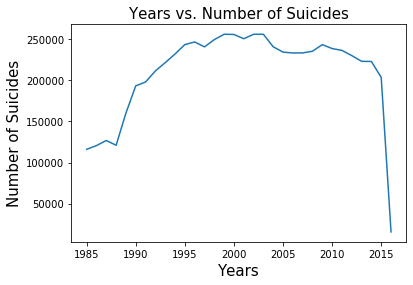

In [6]:
plt.plot(a['year'],a['suicides_no'])
plt.xlabel("Years",size = 15)
plt.ylabel("Number of Suicides",size = 15)
plt.title("Years vs. Number of Suicides", size = 15)

From the graph, there is an extreme dip after the year 2015, for the year 2016. To dig some more, lets see a count of data for each column using the pandas group by 

In [7]:
a =df.groupby(['year']).count().reset_index()
display(a.tail())

,year,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27,2012,972,972,972,972,972,972,972,936,972,972,972
28,2013,960,960,960,960,960,960,960,924,960,960,960
29,2014,936,936,936,936,936,936,936,900,936,936,936
30,2015,744,744,744,744,744,744,744,0,744,744,744
31,2016,160,160,160,160,160,160,160,0,160,160,160


There is clearly some data missing for 2016, as there seems are only 170 entries for 2016, compared to the volumes for the years before. Research from the previous report contradicts that finding, so there must be some missing data. For that reason, we will omit 2016 from our observations and observe suicide data from 1985-2015 instead. 
<br>
<br>
Note that the HDI column also shows incosistent count values, hence we will not consider it when later analysing the factors behind suicide numbers. Also, from the [definition](https://www.investopedia.com/terms/h/human-development-index-hdi.asp) of HDI, it is calculated by looking at life expectancies. Hence, analyzing it as a factor for suicide numbers would result in falsely positive results, as suicide numbers affect the calculation of HDI. 
<br>
<br>
Now we'll remove the year 2016 from our data frame, then replot the graph.  

Text(0.5, 1.0, 'Years vs. Number of Suicides')

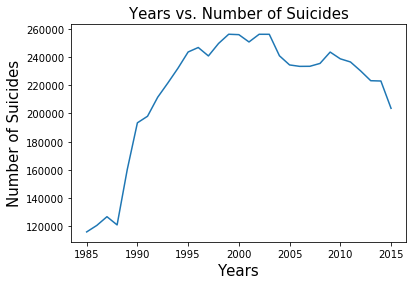

In [8]:
is_not_2016 =  df['year']!=2016
df = df[is_not_2016]
a =df.groupby(['year']).sum().reset_index()
plt.plot(a['year'],a['suicides_no'])
plt.xlabel("Years",size = 15)
plt.ylabel("Number of Suicides",size = 15)
plt.title("Years vs. Number of Suicides", size = 15)

The graph corroborates the before mentioned report, suggesting that suicide rates have been climbing up steadily over the given time period that we're analyzed. There's a steep rise around the 1990's interestingly, which could be a future direction of inquiry. 

# 2.2 Looking at Suicide numbers vs GDP
There are several studies that suggest suicide rates and numbers might be influenced by economic factors. This [tutorial](https://rpubs.com/beancounter/430586) finds a relation between the economic conditions in an area and the suicide numbers. We seek to do the same, by plotting the Gross Domestic Product per capita, which is a measure of a country's economic output that controls for its number of people. We also control for population by using the suicide per 100 thousand statistic, to ensure that countries with high populations do not get unfairly represented.     

Text(0.5, 1.0, 'GDP vs. Suicides')

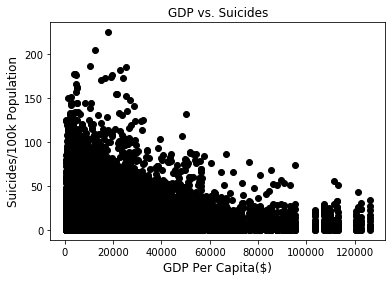

In [9]:
plt.scatter(df['gdp_per_capita ($)'],df['suicides/100k pop'],c='black')
plt.xlabel("GDP Per Capita($)", size = 12)
plt.ylabel("Suicides/100k Population", size=12)
plt.title("GDP vs. Suicides")

The scatter plot confirms what we already suspect, that there is a overwhelming tendency for lower GDP per capita to correspond to having a higher rate of suicide. This raises more questions on how much of an impact the country has overall on suicide numbers, which we explore next.

# 2.3 Looking at Suicide numbers vs Country
Based of the observations of how the GDP of a country affects suicide rate, it makes sense to transition to how much of a factor the country any subset of people resides in makes a difference to suicide rates. Based of what country a population of people is, there would be a lot of factors that apply to them, such as social customs, government rules, general standard of living, education and health levels etc. We seek to gain some insight on how the geographical area a person lives in affects the number of suicides.  


We can first break down the ten countries with the highest suicide rates and compare them with a simple bar graph. We achieve that by grouping the data first by country and then sorting it by suicide numbers. 

In [10]:
groupByCountry = df.groupby(['country']).sum().reset_index()
groupByCountry = groupByCountry.sort_values(by=['suicides_no'])

We can then take out the last ten countries in the sorted dataframe, and then plot it using the bar graph. 

Text(0.5, 1.0, 'Country vs. Suicide Rates')

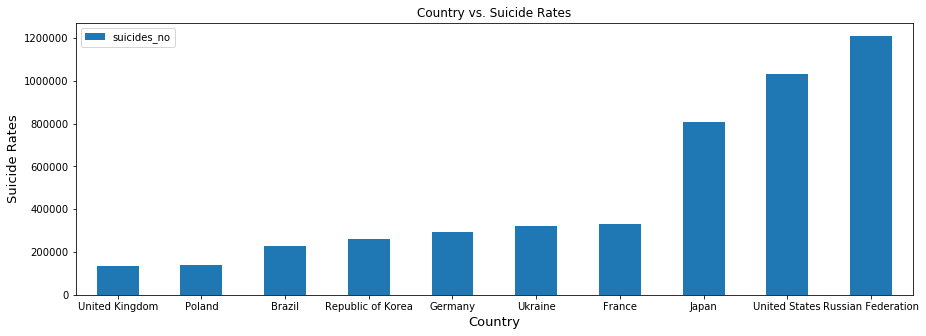

In [11]:
groupByCountry = groupByCountry.tail(10)
ax = groupByCountry.plot.bar(x='country',y='suicides_no', rot=0, figsize=(15,5))
plt.xlabel('Country', size =13)
plt.ylabel('Suicide Rates', size =13)
plt.title("Country vs. Suicide Rates")

This is rather restrictive though, as we're only able to view the top 10 countries. To get a broader sense of the data and the geographical trends underneath it, we can use the Folium library to plot a map that shows all those areas of the world with high suicide rates.  <br><br>
To start with, we group our existing data by country and drop the extraneous information. 

In [12]:
totalSuicidesByCountry = df.groupby(['country']).sum().reset_index()
totalSuicidesByCountry = totalSuicidesByCountry.drop(columns = ['year','population','suicides/100k pop','HDI for year','gdp_per_capita ($)'])

We need coordinate inforation for each country, so we use a dataset from [https://www.kaggle.com/eidanch/counties-geographic-coordinates](https://www.kaggle.com/eidanch/counties-geographic-coordinates) that has a central coordinate for each country. This coordinate will help represent each country on our map. We load this into a dataframe and clean up the data to match our data's format. 


In [13]:
countryLocation = pd.read_csv("countries.csv", sep=',')
countryLocation = countryLocation.drop(columns= ['country'])
countryLocation = countryLocation.rename(columns={"name":"country"})
display(countryLocation.head())

,latitude,longitude,country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


Before we can plot the map based off of suicide numbers, we'll need to join the two separate dataframes into one dataframe. We can use an inner join on the country column for both dataframes. However, we'll need to standardize the country names in both so that the join represents all the countries. Looking at the data we have and the data from the link above, there are two notable differences. The data we have used the term <b>Russian Federation</b>, while the coordinate dataset uses <b>Russia</b>. Another difference is our data set using the term <b> Republic of Korea </b>, while the coordinate dataset uses <b> North and South Korea </b>. We can replace both the terms in the coordinate dataset, for the sake of the uniformity. 

In [14]:
countryLocation=countryLocation.replace('Russia','Russian Federation')
countryLocation=countryLocation.replace('South Korea','Republic of Korea')
countryLocation=countryLocation.replace('North Korea','Republic of Korea')
display(countryLocation.head())

,latitude,longitude,country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


Now, we use the merge function to perform an inner join operation between the two dataframes. 

In [15]:
totalSuicidesmerged =(pd.merge(totalSuicidesByCountry,countryLocation, on='country', how='inner'))
display(totalSuicidesmerged.head())

,country,suicides_no,latitude,longitude
0,Albania,1970,41.153332,20.168331
1,Antigua and Barbuda,11,17.060816,-61.796428
2,Argentina,82219,-38.416097,-63.616672
3,Armenia,1838,40.069099,45.038189
4,Aruba,101,12.521110,-69.968338


We can now plot the map using the Folium Libraries. We mark the countries with suicide rates with circles, with the radius of the circle depending on the number of suicides there. That is, bigger the circle on a country, the more the suicides. 

In [16]:
map2 = folium.Map(location=[0, 0], zoom_start=2)
totalSuicidesmerged.apply(lambda row:folium.Circle(
                                                radius=[row["suicides_no"]], 
                                                location=[row["latitude"],row["longitude"]],
                                                popup='The Waterfront',
                                                color='blue',
                                                fill=True,
                                                ).add_to(map2), axis=1)

display(map2)

# 2.4 Looking at Suicide numbers vs Generation.
There are multiple articles, like this one titled ['More Millennials Are Dying 'Deaths of Despair'](https://time.com/5606411/millennials-deaths-of-despair/) that talk about some generations of people tend to have higher tendencies that lead to them being more likely to commit suicide. It's definitely an important factor to consider when trying to identify possible influences on suicide numbers for a group of people.  <br><br>
We decide to first see the different generations that were present in the data. 

In [17]:
print(df['generation'].unique())

['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


From [https://genhq.com/faq-info-about-generations/](https://genhq.com/faq-info-about-generations/), the different generations are defined as follows:<br>
1. Gen Z, iGen, or Centennials: Born 1996 – TBD
2. Millennials or Gen Y: Born 1977 – 1995
3. Generation X: Born 1965 – 1976
4. Baby Boomers: Born 1946 – 1964
5. Traditionalists or Silent Generation: Born 1945 and before

<br>
We can then group the data by generation and plot the suicides per generation. 

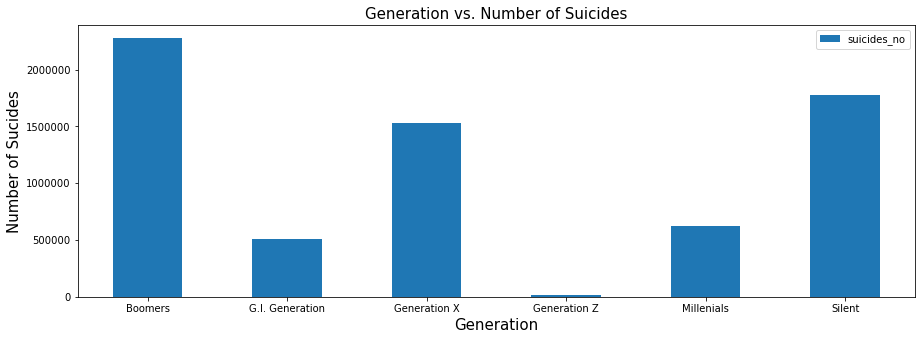

In [18]:
groupByGen = df.groupby(['generation']).sum().reset_index()
ax = groupByGen.plot.bar(x='generation', y = 'suicides_no', rot=0, figsize=(15,5))
groupByGen = plt.xlabel('Generation',size=15)
groupByGen = plt.ylabel('Number of Sucides', size=15)
groupByGen = plt.title('Generation vs. Number of Suicides', size=15)


The graph shows that the Boomer generation has the highest recorded numbers of suicide through this time frame, which intuitively makes sense as this time period corresponds 

We can now look at how these generations have shown trends relative to each other through the time peroiod. Plotting a line graph with each of the generations helps us visualize that. Note that we have to clean the data, as all generations don't have suicide data for every generation. The graph currently has dips that correspond to that period. 

To make the data simple to graph, we have now deleted the unecessary columns and used groupby to find the total number of suicides in one year for male and female. 

In [19]:
# Plot based on year(x-axis), suicide rates(y-axis), line for every generation
genDf = df.groupby(['generation','year']).sum().reset_index()
genDf = genDf.drop(columns=['population', 'suicides/100k pop', 'HDI for year','gdp_per_capita ($)'])

We notice that there are many generations that reach 0.0 suicide rates however this is due to the time frames of those generations. These lines are shown as the ones that reach 0.0 number of suicide rates in the graph. Due to this, it seems some generations have no suicide rates however that is false. These data points were originally represented as NaN, however to prevent errors, we have converted them into 0.0s.

We also transpose the data, making all the columns as the different generations to easily graph. The last few are shown below.

In [20]:
genDf = genDf.pivot(index = 'year',columns='generation')
genDf = genDf.replace(np.NaN,0.0)
display(genDf.tail(5))

suicides_no                                                       \
generation     Boomers G.I. Generation Generation X Generation Z Millenials   
year                                                                          
2011           59178.0             0.0      85345.0       1879.0    65873.0   
2012           58443.0             0.0      82482.0       1752.0    62905.0   
2013           57696.0             0.0      80227.0       1806.0    59317.0   
2014           57696.0             0.0      79132.0       1882.0    59409.0   
2015           53588.0             0.0      71298.0       1681.0    53959.0   

                     
generation   Silent  
year                 
2011        24209.0  
2012        24578.0  
2013        24153.0  
2014        24865.0  
2015        23114.0

At this point, we have reached a line graph that represents the number of suicides happening throughout these years. Each line represents a different generation. 

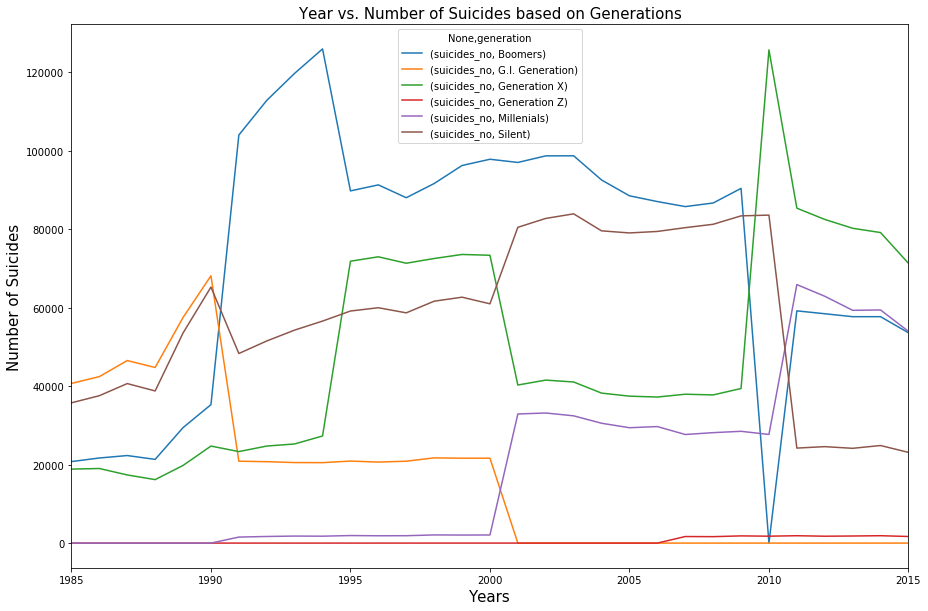

In [21]:
# Line graph
y = genDf.plot.line()
fig = plt.gcf()
fig.set_size_inches(15,10)
fig = plt.xlabel("Years",size = 15)
fig = plt.ylabel("Number of Suicides",size = 15)
fig = plt.title("Year vs. Number of Suicides based on Generations", size = 15)

The graph shows that a lot of generations dont't seem to have much of an overall direction, but that the suicide rates are definitely affected by what generation a person is in. 

# 2.5 Looking at Suicide Numbers vs Gender
We can also analyze the proportion of suicides between the genders over the dataset. We first look at what kind of genders our data has:

In [22]:
print(df['sex'].unique())

['male' 'female']


Having confirmed that there are two genders being tracked by this data, we generate a heatmap to track the data through these years. 

To start with, we transform our existing data and make the years as the new columns to easily graph. Each number in the graph represents the average number of suicide rates for a given year and gender. 

In [23]:
# Dataframe for year vs. gender
genderDf = pd.pivot_table(df, values='suicides_no', 
                     index=['sex'], 
                     columns='year')

display(genderDf)

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
sex,,,,,,,,,,,,,,,,,,,,,
female,112.774306,117.541667,108.043210,112.295918,132.567308,130.515625,129.223958,132.223077,131.617949,126.303922,...,102.037255,103.341085,105.829412,102.846442,102.693182,105.844961,109.076132,107.206250,110.162393,127.010753
male,290.222222,301.451389,283.444444,299.357143,381.035256,373.028646,386.453125,410.015385,436.497436,442.477941,...,355.533333,349.000000,355.831373,353.121723,349.393939,352.457364,364.504115,357.791667,366.299145,420.408602


With the use of these heatmaps we understand how the suicide rates has increased/decreased over the year. As shown below, total number of suicide rates for women around the world is much lower then men. Max number of suicides for both men and women are found to be during the time around 1994. The darker the color, the more the suicides have occured during that year and for that gender. 

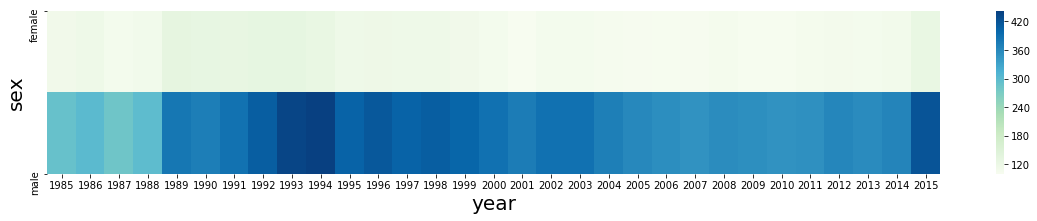

In [24]:
#display(x)
fig, ax = plt.subplots(figsize=(20,3))
ax.set_ylabel('Sex', fontsize = 20)
ax.set_xlabel('Years', fontsize = 20)  
y = sns.heatmap(genderDf, annot=False, cmap = 'GnBu', ax=ax)

# 3.Trying to Predict Suicide numbers using the factors given
Using all the trends we've seen so far, we can try to use these different factors we've observed and predict a numerical value for the number of suicides that could take place in a given subsection of people. This will be a more difficult task than most other models, as we'll be trying to use non numerical values to predict values that are numerical in nature. There is an inherent uncertainty to this act, as the categorical data we're analyzing doesn't directly map to numbers. We'll go on and try our best to handle this, and compare some different prediction models

First, we'll map out our features, that we'll be using as independent variables and our dependent variable, which is the suicide number.

In [25]:
factors = ['country','sex','generation','gdp_per_capita ($)','year']
features = df[factors]
suicide = df[['suicides_no']]

# 3.1 Using Hot Encoding
A popular way to use categorical data to map to non numerical data is to use the hot encoding technique. In this, each catergorical column of a dataframe is split into all the possible values it can take, and 1's and 0's are used for each row to determine what the value for that row should be. An excellent example can be found [here](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d). <br>
A simple example can be seen using the pandas get dummies function.

In [26]:
tmp=df.copy()
tmp = pd.get_dummies(tmp)
display(tmp.head())

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,...,"gdp_for_year ($) _99,853,528,653","gdp_for_year ($) _99,886,577,331","gdp_for_year ($) _990,374,050","gdp_for_year ($) _997,007,926",generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,NaN,796,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,NaN,796,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,NaN,796,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,NaN,796,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1987,9,274300,3.28,NaN,796,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


As you can see, each categorical variable has been stretched out into all of it's possible values
Now, we can use the OneHotEncoder funtion from sklearn to create a hot encoder for us from our data. 
For more information: The sklearn [docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) are helpful.

In [27]:
enc = OneHotEncoder(sparse=False)
X_hot_encode = enc.fit_transform(features)
display(X_hot_encode)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

X_hot_encode is now a feature variable generated by using the hot encoder
<br><br>
# 3.2 Converting each categorical value to a number
Another approach to the problem of trying to use categorical values to predict numerical ones is converting each categorical value to an independent number. This is explained better [here](https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/), but the basic idea is to basically give each category of the variable a unique identifier and map every instance with that specific identifier. The code below does exactly that by using this function that generates a unique hash for every value in a column it sees that is not numerical.

In [28]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df
newdf = df.copy()
newdf = handle_non_numerical_data(newdf)
display(newdf.head())
features2 = newdf[factors]
suicide2 = newdf[['suicides_no']]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,71,1987,0,1,21,312900,6.71,2154,NaN,1494,796,5
1,71,1987,0,3,16,308000,5.19,2154,NaN,1494,796,1
2,71,1987,1,1,14,289700,4.83,2154,NaN,1494,796,5
3,71,1987,0,0,1,21800,4.59,2154,NaN,1494,796,3
4,71,1987,0,5,9,274300,3.28,2154,NaN,1494,796,2


As can be seen, the above dataframe now has numbers for all of its categorical variables. 
<br><br>
# 3.3 Using Random Forests Regression 
We'll first use Random forests to try and predict the number of suicides given all the other factors for a certain set of people. Random forests regression is based off of the idea of generating multiple decision trees and using all of them to guess the output. For more information, read [here](https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb). 
<br><br>
We'll first use a random forests regression with the method of converting each categorical value to a number. We fit the model to the features and output from the newdf dataframe that we just defined and then compute the R^2 score for the model

In [29]:
X = features2
y = suicide2
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X,y)
print('R^2 Score:')
print(regr.score(X,y))

R^2 Score:
0.14356631045772217


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The R^2 score can go up to a maximum of 1, where 1 is the most accurate. This model isn't performing very well unfortunately. To confirm that, we can create a graph to model the predicted values of the graph against the actual value. <br>
We first split our data into training and test sets

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, suicide, test_size=0.2)

We then create the model and train it

In [31]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
model = regr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


We then generate predictions for the test set, that'll later be compared.

In [32]:
predictions = regr.predict(X_test)

Finally, we plot the predictions against the actual values.

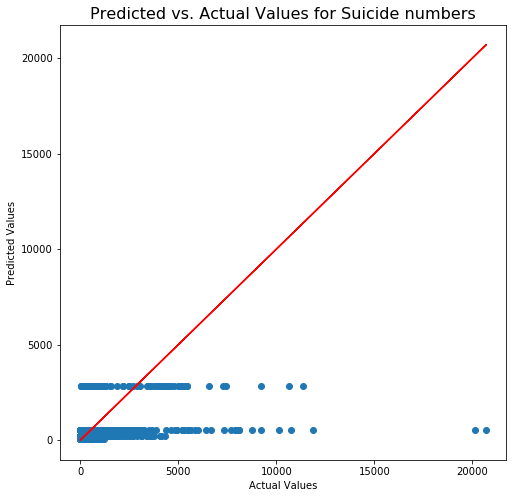

In [33]:
plt.figure(figsize=(8,8))
plt.title("Predicted vs. Actual Values for Suicide numbers", fontsize=16)
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, color="Red") 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

We then carry out the exact same process, but this time our feature set will be the X_hot_encode set, that we created using hot encode.

In [34]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_hot_encode,y)
print('R^2 Score:')
print(regr.score(X_hot_encode,y))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 Score:
0.3781039740848047


This is performing better than the model above, suggesting that using the hot encoding is a better idea. We can now plot the predicted vs expected values, as we did before.

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


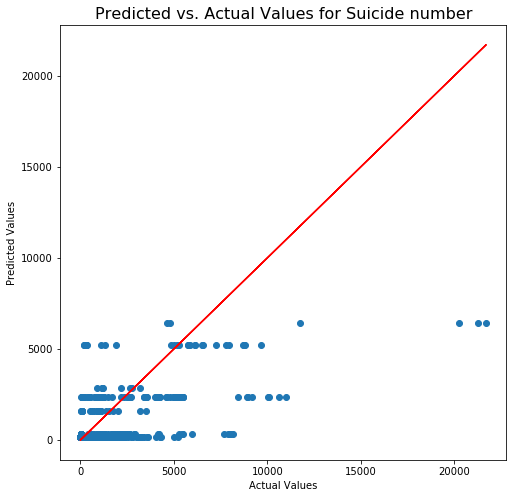

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_hot_encode, suicide, test_size=0.2)

regr = RandomForestRegressor(max_depth=2, random_state=0)
model = regr.fit(X_train, y_train)

# generate predictions for player Rating to compare with y_test data
predictions = regr.predict(X_test)

plt.figure(figsize=(8,8))
plt.title("Predicted vs. Actual Values for Suicide number", fontsize=16)
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, color="Red") # identity line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# 3.3 Using Linear Regression 
We'll now use Linear Regression to try and predict the number of suicides given all the other factors for a certain set of people. Linear Regression tries to fit a linear equation based of the training data to account for the different factors and predict a value. For more information, read [here](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f). 
<br><br>
The process is paralell to what was just done with the Random Forests, we'll first conduct the regression with the method of converting each categorical value to a number. We fit the model to the features and output from the newdf dataframe that we just defined and then compute the R^2 score for the model. We'll then plot the predicted vs actual suicide numbers

R^2 Score:
0.05872230583679793


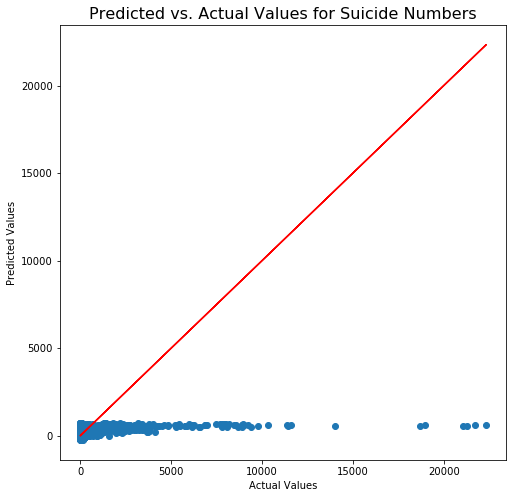

In [36]:
X = features2
y = suicide2
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
print('R^2 Score:')
print(lm.score(X,y))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, suicide, test_size=0.2)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:10]
plt.figure(figsize=(8,8))
plt.title("Predicted vs. Actual Values for Suicide Numbers", fontsize=16)
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, color="Red") # identity line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

The R^2 square score and the plot suggest that this isn't an ideal method to use for prediction. We'll now do the same process using the sklearn hot encoded model, with linear regression.

R^2 Score:
0.46843458350937933


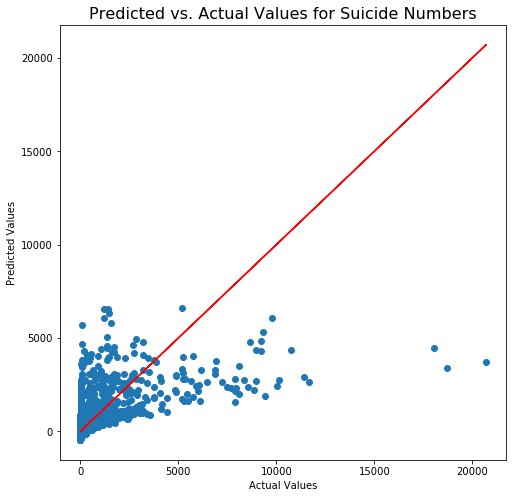

In [37]:
lm = linear_model.LinearRegression()
model = lm.fit(X_hot_encode,y)
print('R^2 Score:')
print(lm.score(X_hot_encode,y))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_hot_encode, suicide, test_size=0.2)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:10]
plt.figure(figsize=(8,8))
plt.title("Predicted vs. Actual Values for Suicide Numbers", fontsize=16)
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, color="Red") # identity line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

While far from usable, this is definitely the best model that we've seen so far. It is almost at 50 percent accuracy. 
<br>
<br>
# 4. Conclusion 
To conclude, there are definitely factors that affect the number of suicides taking place in communities. The exploratory data analysis proved that and also helped illustrate what a lot of people would consider intuition or common sense. However, using these general trends to try and predict concrete values seems unfeasible in practice. It would obviously be very beneficial to be able to predict what suicide rates could look like in certain situations, as this would help people be more aware where help is needed and what areas are most at risk. 
<br><br>
When fitting the mathematical model to try and use catergorical data, the approach of assigning each data arbitary values wasn't effective at all. This was probably due to the data being given weights that they did not deserve, that is, the tenth unique value is unfairly given 10 times the weight of the first unique value in this approach. The hot encoding approach yielded marginally better results, and perhaps more work can be done to tailor it better to this dataset. 
<br><br>
Hopefully, even more progress can be made that builds off of these approaches to narrow down the exact factors that drive one of the biggest problems our society is facing today.